In [2]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

## Exponent Moving Average

In [92]:
def exponential_smoothing(series, alpha):
    # series = series/series[0]
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [100]:
# считает MSE по нормализованным ценам ()
def exponential_smoothing_mse(series, alpha):
    series = series/series[0]
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    mse = np.square(np.subtract(series, result)).mean()
    return mse

In [134]:
stock_ticker = 'TSLA'
alpha = 0.5
stock_history = pd.read_csv('data/%s - 2021-01-13.csv' %stock_ticker)

In [135]:
exponential_smoothing_mse(stock_history['c'], alpha), \
np.sqrt(exponential_smoothing_mse(stock_history['c'], alpha))

(0.00040838929461696217, 0.020208644056862454)

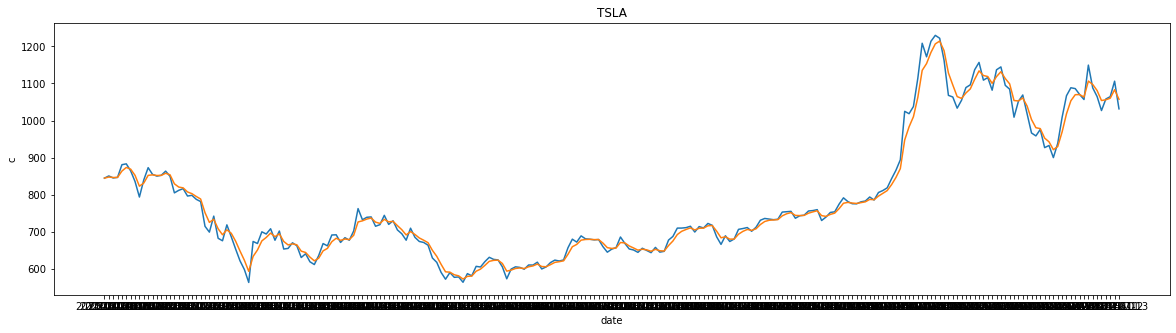

In [136]:
plt.figure(figsize=(20,5))
sns.lineplot(data=stock_history, y='c', x='date').set_title(stock_ticker)
stock_pred = exponential_smoothing(stock_history['c'], alpha)
sns.lineplot(y = stock_pred, x = stock_history['date']);

### Predicting few days ahead (Moviing average)

In [26]:
stock_ticker = 'TSLA'
alpha = 0.5
stock_history = pd.read_csv('data/%s - 2021-01-13.csv' %stock_ticker)

In [140]:
stock_history.head()

,Unnamed: 0,date,o,c,h,l,v,POSITIVE,NEGATIVE
0,0,2021-01-19,837.80,844.55,850.0000,833.0000,25366980,14.0,4.0
1,1,2021-01-20,858.74,850.45,859.5000,837.2800,25665883,6.0,4.0
2,2,2021-01-21,855.00,844.99,855.7199,841.4201,20598133,4.0,7.0
3,3,2021-01-22,834.31,846.64,848.0000,828.6200,20066497,9.0,2.0
4,4,2021-01-25,855.00,880.80,900.4000,838.8201,41173397,10.0,4.0


In [9]:
def exponential_smoothing(stock_history, alpha):
    # series = series/series[0]
    series = stock_history['c']

    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
        if stock_history['date'][n] == date_forecast: break
    # предсказываем на предсказаниях на days_forward вперед
    for i in range(0, days_forward):
        result.append(alpha * result[n] + (1 - alpha) * result[n-1])
    return result

In [10]:
# moving average не работает на несколько дней вперед (вот сюрприз!)
date_forecast = '2021-01-25'
days_forward = 5
stock_ticker = 'TSLA'
alpha = 0.1
stock_history = pd.read_csv('data/%s - 2021-01-13.csv' %stock_ticker)

exponential_smoothing(stock_history, alpha) 

[844.55,
 845.1400000000001,
 845.1250000000001,
 845.2765,
 848.8288500000001,
 845.631735,
 845.631735,
 845.631735,
 845.631735,
 845.631735]

## ARIMA (16/01)

In [130]:
from pandas.tseries.offsets import DateOffset

In [58]:
stock_ticker = 'AAPL'
stock_history = pd.read_csv('long_history/%s - history.csv' %stock_ticker)

In [142]:
stock_history['Date'] = pd.to_datetime(stock_history['Date'])

In [143]:
close_history = stock_history[['Date','Close']].copy()
close_history.columns = ['date','c']

In [144]:
close_history.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

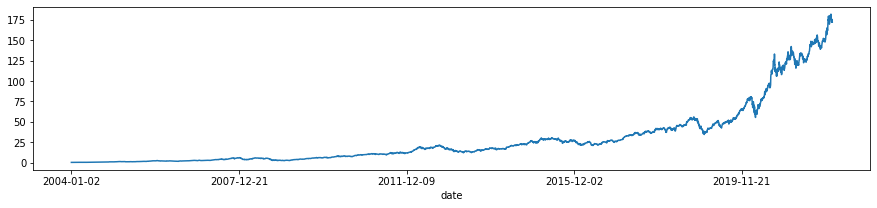

In [68]:
close_history = close_history[close_history.index>'2004-01-01']
close_history['c'].plot(figsize=(15,3))

In [71]:
from statsmodels.tsa.stattools import adfuller
#p-value for auto-correlation
print(adfuller(close_history['c'])[1])
print(adfuller(close_history['c'])[1]<0.05)

0.781696424626945
False


In [70]:
close_history['1diff'] = close_history['c'] - close_history['c'].shift(1)

In [94]:
close_history['2diff'] = close_history['1diff'] - close_history['1diff'].shift(1)

<AxesSubplot:xlabel='date'>

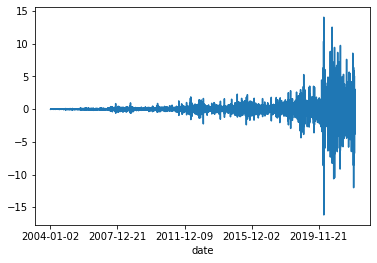

In [95]:
close_history['2diff'].plot()

In [96]:
#p-value for auto-correlation
print(adfuller(close_history['2diff'].dropna())[1])
print(adfuller(close_history['2diff'].dropna())[1]<0.05)

0.0
True


/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


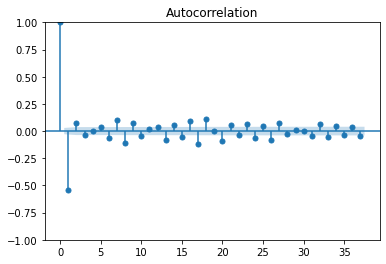

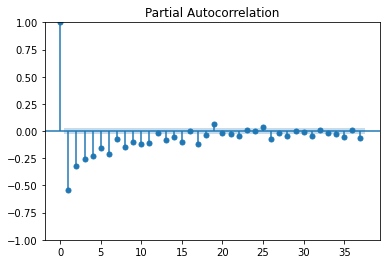

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_acf(close_history['2diff'].dropna())
fig2=plot_pacf(close_history['2diff'].dropna())

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [166]:
model=SARIMAX(close_history['c'],order=(1,2,1),seasonal_order=(1, 0, 0, 3))
result=model.fit()

/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.53241D-01    |proj g|=  1.40557D-01

At iterate    5    f=  9.09022D-01    |proj g|=  1.00900D-01

At iterate   10    f=  8.82838D-01    |proj g|=  2.46698D-02

At iterate   15    f=  8.75782D-01    |proj g|=  1.06682D-02

At iterate   20    f=  8.75311D-01    |proj g|=  1.06328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   4.077D-06   8.753D-01
  F =  0.87531077354940789     

CONVERG

In [184]:
start = close_history['c'].shape[0]
pred_period = 150
pred = result.predict(start=start, end=start+pred_period)

/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [173]:
pred.index = [close_history.index[-1]+DateOffset(days=x) for x in range(1,pred_period+2)]
pred = pred.to_frame('pred')

<AxesSubplot:>

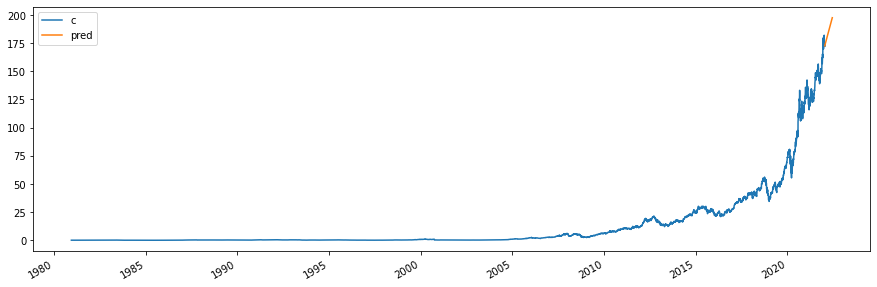

In [183]:
pd.concat([close_history, pred]).plot(figsize=(15,5))

## ARIMA. Check various stocks

In [68]:
from pandas.tseries.offsets import BDay

<AxesSubplot:title={'center':'SPLK history'}, xlabel='date'>

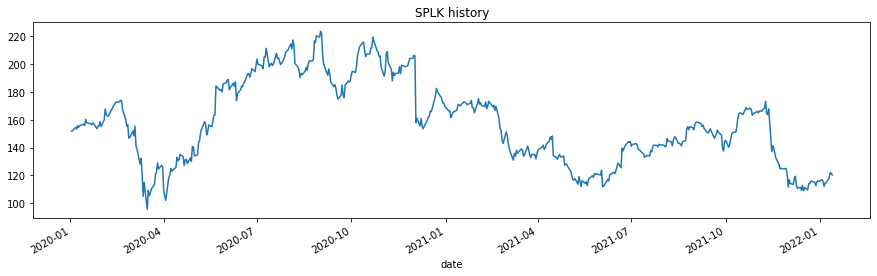

In [85]:
# готовым данные. 
stock_ticker = 'SPLK'
from_date = '2020-01-01'

stock_history = pd.read_csv('long_history/%s - history.csv' %stock_ticker)
stock_history['Date'] = pd.to_datetime(stock_history['Date'])
close_history = stock_history[['Date','Close']].copy()
close_history.columns = ['date','c']
close_history.set_index('date',inplace=True)
close_history = close_history[close_history.index > from_date]
close_history['c'].plot(figsize=(15,4), title=stock_ticker+' history')

In [86]:
# Отрезаем последние N записей. С ними будем сравнивать потом.
pred_period = 30

model=SARIMAX(close_history['c'][:-pred_period],order=(3,1,1),seasonal_order=(1, 0, 0, 12))
result=model.fit()

/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04994D+00    |proj g|=  6.67570D-03

At iterate    5    f=  3.04990D+00    |proj g|=  8.50393D-04

At iterate   10    f=  3.04990D+00    |proj g|=  1.67659D-04

At iterate   15    f=  3.04989D+00    |proj g|=  5.11485D-03

At iterate   20    f=  3.04968D+00    |proj g|=  5.97954D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     33      1     0     0   2.991D-05   3.050D+00
  F =   3.0496824685105013     

CONVERG

/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:title={'center':'SPLK history & ARIMA pred'}>

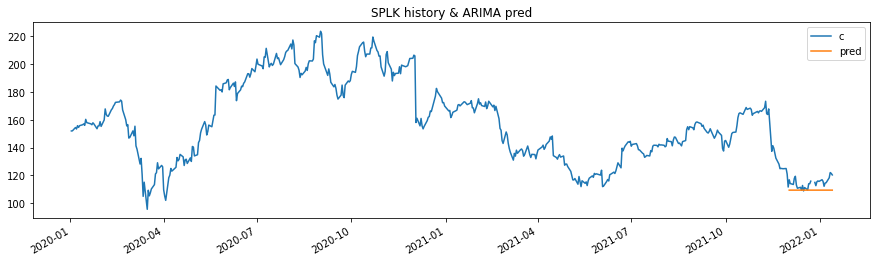

In [87]:
start = close_history['c'].shape[0]
pred = result.predict(start=start, end=start+pred_period)
pred.index = [close_history.index[-pred_period-1]+BDay(x) for x in range(1,pred_period+2)]
pred = pred.to_frame('pred')
pd.concat([close_history, pred], axis=1).plot(figsize=(15,4), title=stock_ticker+' history & ARIMA pred')

In [88]:
compr_pred = pd.concat([close_history, pred], axis=1)[-32:]

mse = np.square(np.subtract(compr_pred['c'], compr_pred['pred'])).mean()
print('mse:'+str(mse)+'; rmse:'+str(np.sqrt(mse)))

mse:40.06941791401653; rmse:6.330040909347785


## ARIMA. Check various stocks (normalized)

In [312]:
from pandas.tseries.offsets import BDay

<AxesSubplot:title={'center':'MSFT history'}, xlabel='date'>

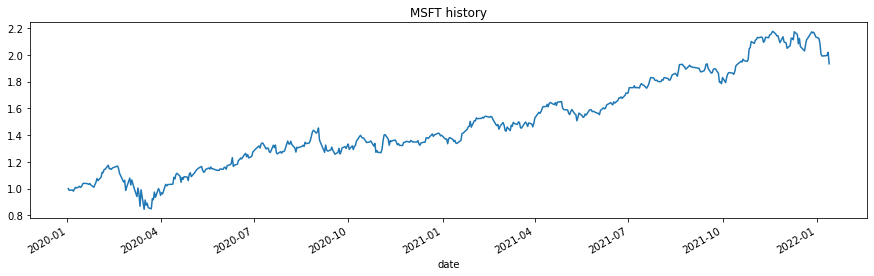

In [101]:
stock_ticker = 'MSFT'
from_date = '2020-01-01'

stock_history = pd.read_csv('long_history/%s - history.csv' %stock_ticker)
stock_history['Date'] = pd.to_datetime(stock_history['Date'])
close_history = stock_history[['Date','Close']].copy()
close_history.columns = ['date','c']
close_history.set_index('date',inplace=True)
close_history = close_history[close_history.index > from_date]
# normalization
close_history['c'] = close_history['c']/close_history['c'][0]
close_history['c'].plot(figsize=(15,4), title=stock_ticker+' history')

In [102]:
# predicting without last days (which will be predicted)
pred_period = 30

model=SARIMAX(close_history['c'][:-pred_period],order=(3,1,1),seasonal_order=(1, 0, 0, 12))
result=model.fit()

/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.24613D+00    |proj g|=  2.80411D-01

At iterate    5    f= -2.24614D+00    |proj g|=  1.06663D-01

At iterate   10    f= -2.24627D+00    |proj g|=  3.14475D-01

At iterate   15    f= -2.24630D+00    |proj g|=  1.88597D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     41      1     0     0   3.711D-03  -2.246D+00
  F =  -2.2462972381882746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


/Users/oslikdau/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:title={'center':'MSFT history & ARIMA pred'}>

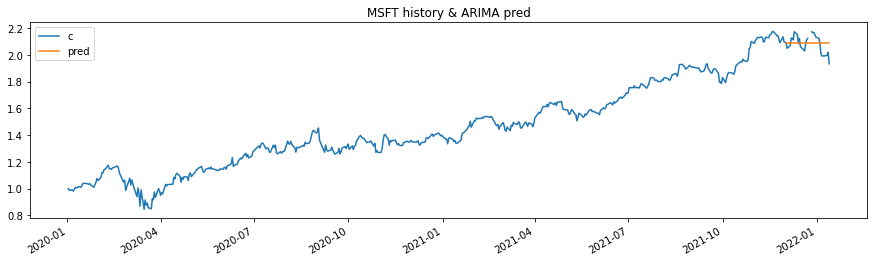

In [103]:
start = close_history['c'].shape[0]
pred = result.predict(start=start, end=start+pred_period)
pred.index = [close_history.index[-pred_period-1]+BDay(x) for x in range(1,pred_period+2)]
pred = pred.to_frame('pred')
pd.concat([close_history, pred], axis=1).plot(figsize=(15,4), title=stock_ticker+' history & ARIMA pred')

In [104]:
mse = np.square(np.subtract(compr_pred['c'], compr_pred['pred'])).mean()
print('mse:'+str(mse)+'; rmse:'+str(np.sqrt(mse)))

mse:0.008895408080890265; rmse:0.0943154710579885


In [ ]:
compr_pred = pd.concat([close_history, pred], axis=1)[-32:]
compr_pred

,c,pred
2021-12-01,0.734965,NaN
2021-12-02,0.769312,0.687861
2021-12-03,0.751480,0.686424
2021-12-06,0.747072,0.684986
2021-12-07,0.776352,0.683549
2021-12-08,0.785827,0.682111
2021-12-09,0.744506,0.680673
2021-12-10,0.729306,0.679236
2021-12-13,0.733649,0.677798
2021-12-14,0.719503,0.676361


## Prophet

In [108]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [232]:
# готовым данные. 
stock_ticker = 'PANW'
from_date = '2020-01-01'

stock_history = pd.read_csv('long_history/%s - history.csv' %stock_ticker)
stock_history['Date'] = pd.to_datetime(stock_history['Date'])
close_history = stock_history[['Date','Close']].copy()
close_history.columns = ['date','c']
close_history.set_index('date',inplace=True)
close_history = close_history[close_history.index > from_date]
# for Prohpet. Отрезаем последние N записей. С ними будем сравнивать потом.
pred_period = 30
pr_close = pd.DataFrame({'ds':close_history[:-pred_period].index, \
                        'y':close_history['c'][:-pred_period]}).reset_index()
pr_close.drop(['date'], axis=1, inplace=True)
# pr_close

In [233]:
# normalization
def normalize_close(df):
    df1=df.copy()
    pr_close_norm['y'] = pd.DataFrame(df1['y']/df1['y'][0]*100)
    return close_history_norm

In [234]:
# for Prohpet. Отрезаем последние N записей. С ними будем сравнивать потом.
pred_period = 30
pr_close = pd.DataFrame({'ds':close_history[:-pred_period].index, \
                        'y':close_history['c'][:-pred_period]}).reset_index()
pr_close.drop(['date'], axis=1, inplace=True)

In [235]:
# нормализуем (приводим к 100)

pr_close['y'] = pr_close['y'] / pr_close['y'][0] * 100

In [237]:
prophet = Prophet(changepoint_range=1)
prophet.fit(pr_close)
future = prophet.make_future_dataframe(periods=pred_period+20)
forecast = prophet.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.56088
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1213.18     0.0303923       506.602      0.5606      0.5606      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1240.06    0.00307481       85.5295           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       1242.14    0.00031876       103.076   9.617e-07       0.001      310  LS failed, Hessian reset 
     299       1247.15     0.0280552       231.113      0.9533      0.9533      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       1251.98   0.000551054         203.6   8.816e-07       0.001      477  LS failed, Hessian reset 
     399       1254.93    0.00218171       115.251      0.1347      0.5319      574   
    Iter      log pro

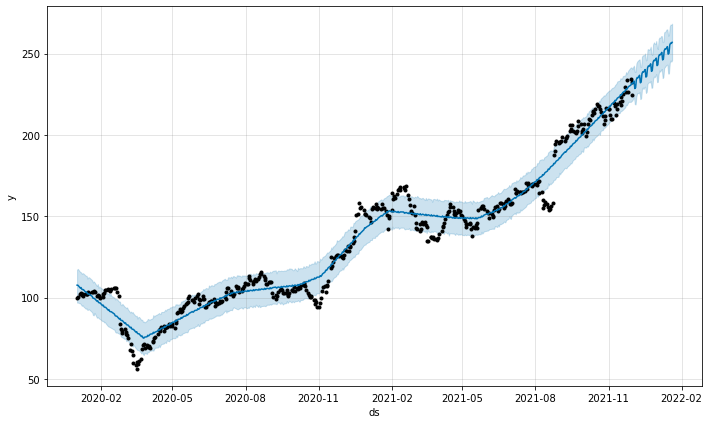

In [238]:
ax=prophet.plot(forecast)

<AxesSubplot:title={'center':'PANW history & Prophet pred'}, xlabel='ds'>

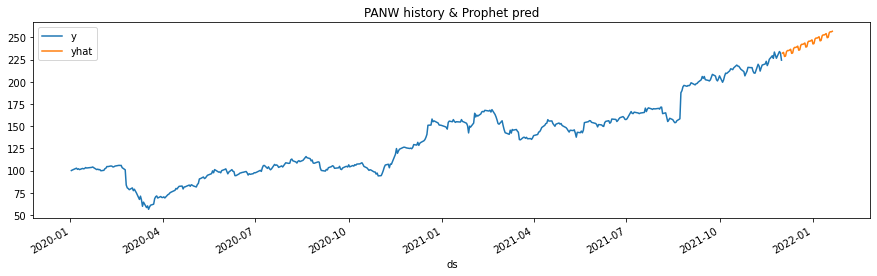

In [242]:
pred = forecast[['ds', 'yhat']]
pred.set_index('ds', inplace=True)
pr_close.set_index('ds', inplace=True)

forecast_day = pr_close.index[-1]
pd.concat([pr_close, pred[pred.index > forecast_day]], \
            axis=1).plot(figsize=(15,4), title=stock_ticker+' history & Prophet pred')

In [243]:
compr_pred = pd.concat([pr_close[-pred_period:], pred[pred.index > forecast_day]], axis=1, join='inner')

mse = np.square(np.subtract(compr_pred['y'], compr_pred['yhat'])).mean()
print('mse:'+str(mse)+'; rmse:'+str(np.sqrt(mse)))

mse:nan; rmse:nan


In [260]:
pr_close

,y
ds,
2020-01-02,100.000000
2020-01-03,100.603202
2020-01-06,102.060231
2020-01-07,102.646445
2020-01-08,101.342340
...,...
2021-11-24,233.515977
2021-11-26,226.515433
2021-11-29,234.136181


In [259]:
pred[pred.index > forecast_day]

,yhat
ds,
2021-12-02,232.271036
2021-12-03,233.135817
2021-12-04,228.497451
2021-12-05,229.000589
2021-12-06,234.110463
2021-12-07,235.272119
2021-12-08,235.112346
2021-12-09,235.792998
2021-12-10,236.657779


## random walk. functions

In [53]:
# готовым данные. 
stock_ticker = 'MSFT'
from_date = '2020-01-01'

def get_stock_history(stock_ticker, from_date):
    stock_history = pd.read_csv('long_history/%s - history.csv' %stock_ticker)
    stock_history['Date'] = pd.to_datetime(stock_history['Date'])
    close_history = stock_history[['Date','Close']].copy()
    close_history.columns = ['date','c']
    close_history.set_index('date',inplace=True)
    close_history = close_history[close_history.index > from_date]
    return close_history

In [65]:
# normalization
def normalize_close(close_history):
    close_history_norm = pd.DataFrame(close_history['c']/close_history['c'][0]*100)
    return close_history_norm

### MSE for all NASDAQ

In [56]:
# stock_ticker = 'MSFT'
from_date = '2021-01-13'
shift = 5

mse_list={}
# MRNA & LCID - extremely volatile. Removed them. 
for i in pd.read_csv('stocks_list(no MRNA & LCID & GOOG).csv')[['Ticker']].values.tolist():
# for i in pd.read_csv('stocks_list origin.csv')[['Ticker']].values.tolist():
    stock_ticker = i[0]
    close_history = get_stock_history(stock_ticker, from_date)
    close_history_norm = normalize_close(close_history)
    mse = np.square(np.subtract(close_history_norm['c'], close_history_norm['c'].shift(shift))).mean()
    mse_list[stock_ticker] = [mse, np.sqrt(mse)]

In [57]:
# по всем акциям
df_mse = pd.DataFrame(mse_list, index=['mse', 'rmse']).T
# df_mse.describe()
df_mse.to_clipboard(excel=True)

### распределение отклонений по акциям

In [714]:
# Считаем по простейшей модели: сравниваем с ценой N дней назад, изменение в %. 
# stock_ticker = 'MSFT'
from_date = '2021-01-13'
shift = 30

diff_list={}
# MRNA & LCID - extremely volatile. Removed them. 
# for i in pd.read_csv('stocks_list(no MRNA & LCID).csv')[['Ticker']].values.tolist():
for i in pd.read_csv('stocks_list origin.csv')[['Ticker']].values.tolist():
    stock_ticker = i[0]
    close_history = get_stock_history(stock_ticker, from_date)
    close_history_norm = normalize_close(close_history)
    diff = (close_history_norm['c'] / close_history_norm['c'].shift(shift)) - 1
 diff_list[stock_ticker] = diff

In [715]:
diff_list

{'ATVI': date
 2021-01-14         NaN
 2021-01-15         NaN
 2021-01-19         NaN
 2021-01-20         NaN
 2021-01-21         NaN
                 ...   
 2022-01-10    0.041076
 2022-01-11    0.091859
 2022-01-12    0.105973
 2022-01-13    0.120286
 2022-01-14    0.141386
 Name: c, Length: 254, dtype: float64,
 'ADBE': date
 2021-01-14         NaN
 2021-01-15         NaN
 2021-01-19         NaN
 2021-01-20         NaN
 2021-01-21         NaN
                 ...   
 2022-01-10   -0.205815
 2022-01-11   -0.229240
 2022-01-12   -0.205240
 2022-01-13   -0.213733
 2022-01-14   -0.225159
 Name: c, Length: 254, dtype: float64,
 'AMD': date
 2021-01-14         NaN
 2021-01-15         NaN
 2021-01-19         NaN
 2021-01-20         NaN
 2021-01-21         NaN
                 ...   
 2022-01-10   -0.147342
 2022-01-11   -0.151936
 2022-01-12   -0.131969
 2022-01-13   -0.109785
 2022-01-14   -0.091585
 Name: c, Length: 254, dtype: float64,
 'ABNB': date
 2021-01-14         NaN
 2021-01-15 

<AxesSubplot:title={'center':'Распределение отклонений акций. Shift=30дней'}, ylabel='Frequency'>

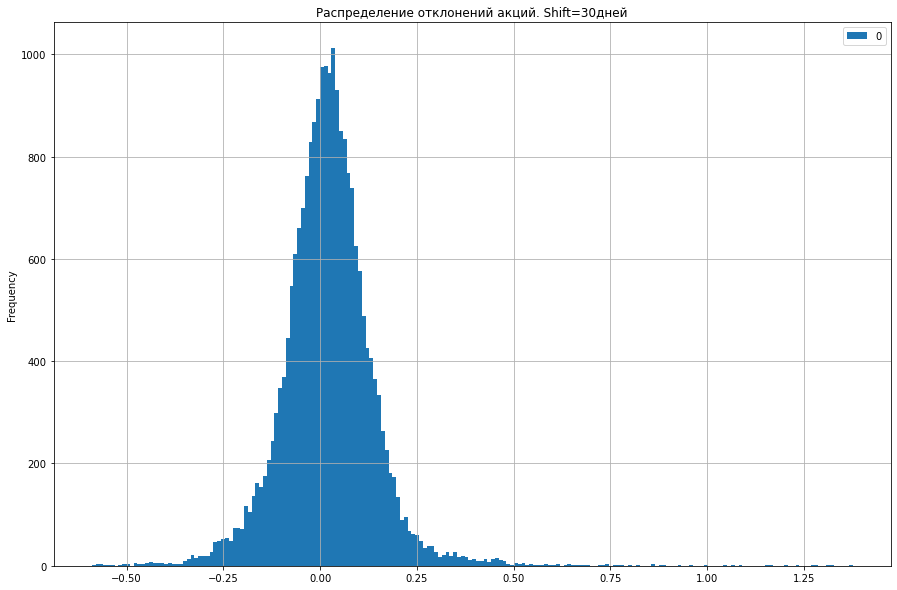

In [716]:
temp_arr = pd.DataFrame(mse_list).dropna().to_numpy().flatten()
pd.DataFrame(temp_arr).plot.hist(bins=200, figsize=(15,10), grid=True, title='Распределение отклонений акций. Shift='+str(shift)+'дней')

In [717]:
pd.DataFrame(temp_arr).std(skipna=True)

0    0.119876
dtype: float64